In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report,roc_curve,roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


Bu notebook da gözetimli ve gözetimsiz sekilde personal-key-indicators-of-heart-disease veri seti öğretildi. Öncelikle kullanılacak kütüphaneler tanıtıldı. Sonrasında ise veri seti (tablo olarak bulunduğu için personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv dosyası kullanıldı.) tanıtıldı.

In [100]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

 -Keşifsel Veri Analizi (EDA - Exploratory Data Analysis),
 için veriler hem yazılı hem de tablo halinde listelendi.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [102]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [103]:
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


Tablo halinde gösterebilmek için string verileri numerik verilerden ayıklandı ve listelendi. 

In [104]:
cat_feats=df.select_dtypes("object").columns
len(cat_feats),cat_feats

(14,
 Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
        'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
        'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
       dtype='object'))

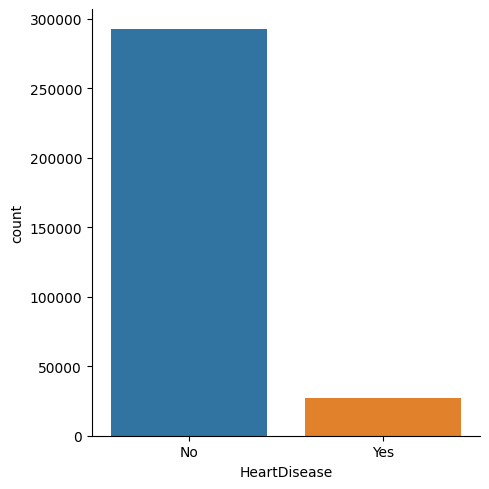

In [105]:
sns.catplot(x="HeartDisease",data=df,kind="count")
plt.show()

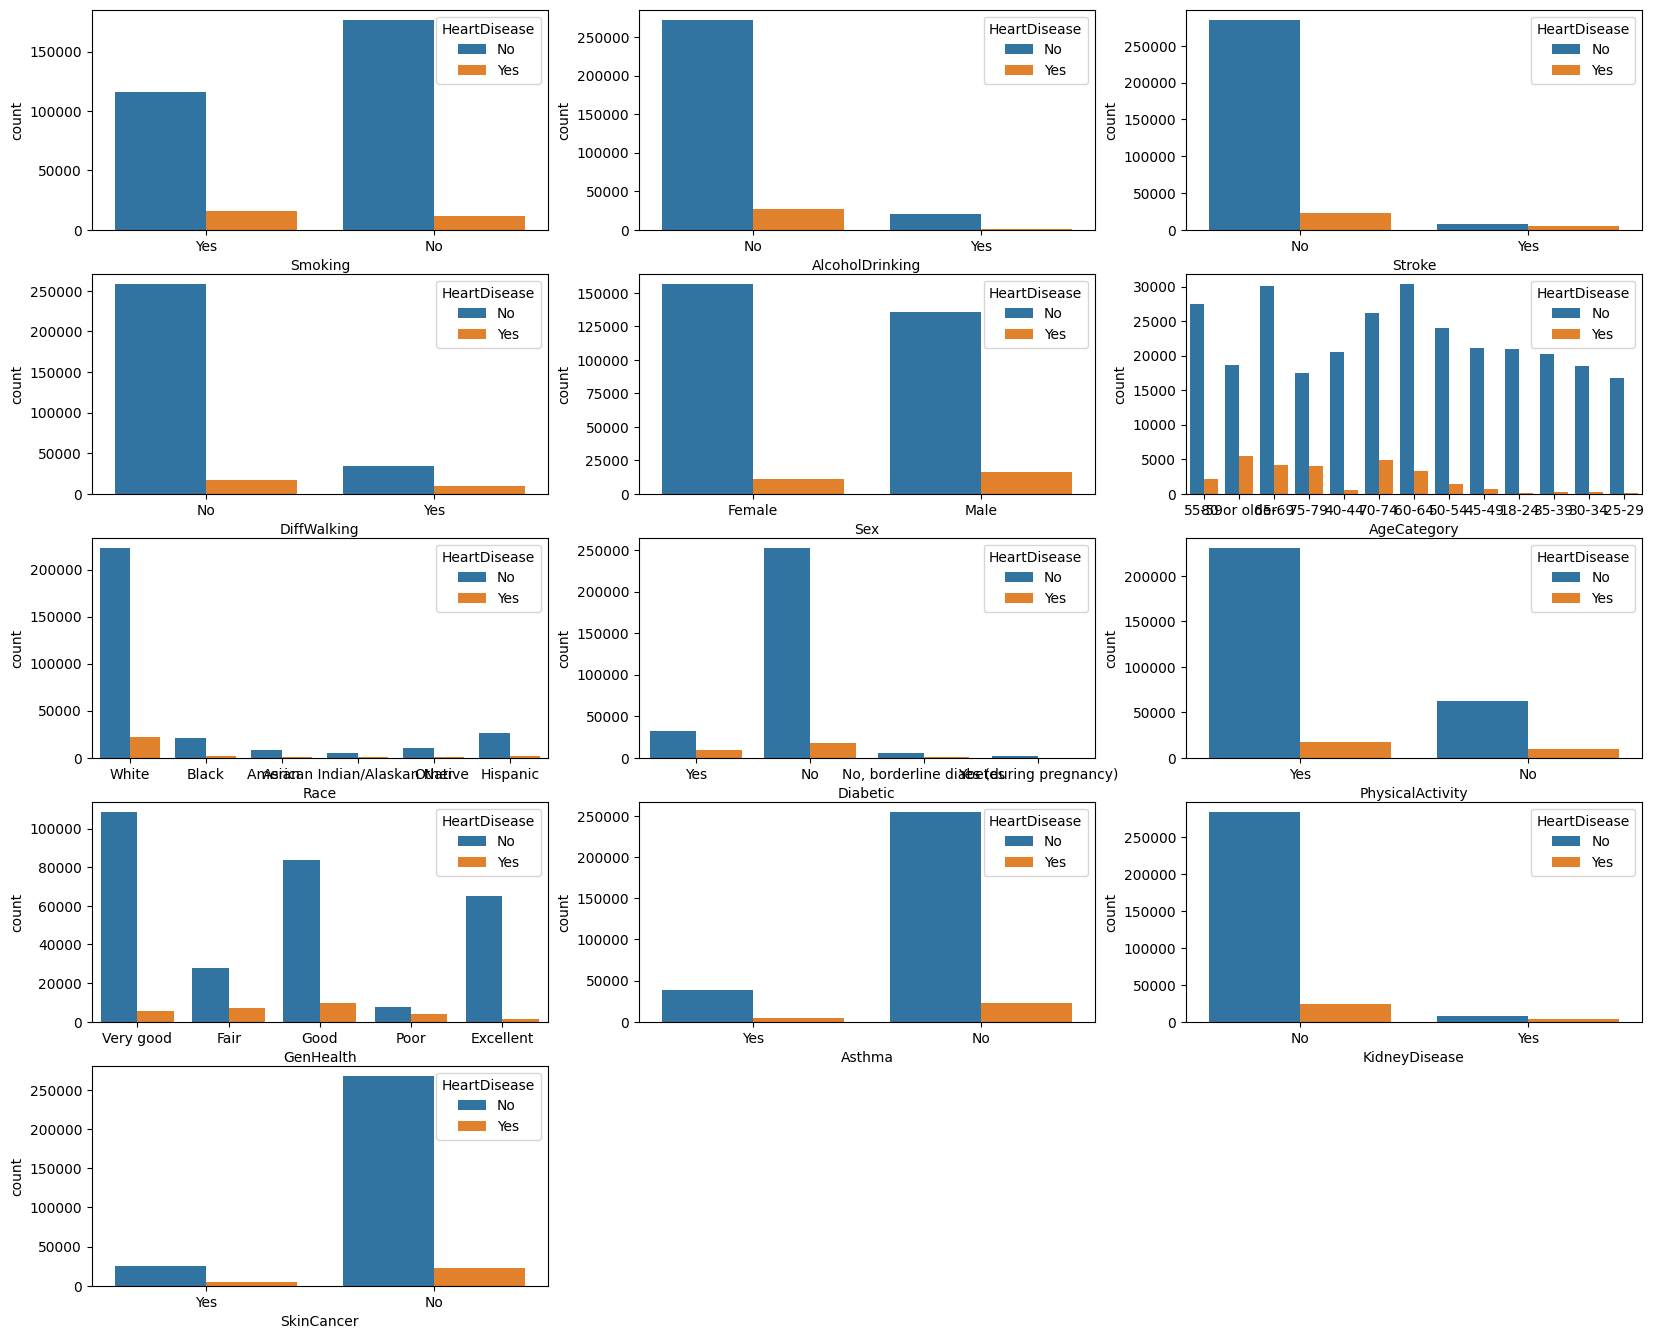

In [106]:
plt.figure(figsize=(20,20))

for i in range(1,len(cat_feats)):
    plt.subplot(6,3,i)
    sns.countplot(x=cat_feats[i],data=df,hue="HeartDisease")
    
plt.show()

numerik veriler de kendi içinde gruplandırıldı. 

In [107]:
num_feats=df.select_dtypes("number").columns
num_feats


Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [108]:
cat_feats = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 
             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
             'Asthma', 'KidneyDisease', 'SkinCancer']

num_feats = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

train_test_split fonksiyonu ile veriler eğitim ve test olarak bölündü, stratify argümanı ise hedef değişkenin (HeartDisease) sınıf dağılımını korur. Veri setindeki sınıf dengesi bozulmadan hem eğitim hem de test setlerinde aynı oranda "HeartDisease" dağılımı elde edildi.

Sonrasında x_train, x_test, y_train, ve y_test değişkenlerinin boyutlarını (shape) görmek için yazdırıldı. 

In [109]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("HeartDisease",axis=1),df["HeartDisease"],stratify=df["HeartDisease"],shuffle=True,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((223856, 17), (95939, 17), (223856,), (95939,))

In [ ]:
veri setindeki string ve numerik değişkenleri farklı dönüşüm teknikleriyle işlemek için bir ColumnTransformer oluşturuldu.

In [110]:
tran = ColumnTransformer(transformers=[
    ("onehot", OneHotEncoder(drop='first'), cat_feats),     
    ("scaling", StandardScaler(), num_feats)    
])
tran

ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Smoking', 'AlcoholDrinking', 'Stroke',
                                  'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                                  'Diabetic', 'PhysicalActivity', 'GenHealth',
                                  'Asthma', 'KidneyDisease', 'SkinCancer']),
                                ('scaling', StandardScaler(),
                                 ['BMI', 'PhysicalHealth', 'MentalHealth',
                                  'SleepTime'])])

In [ ]:
veri işleme adımını düzenlemek için pipeline eklendi.

In [111]:
pipeline = Pipeline(steps=[
    ("preprocessing", tran),                  
    ("classification", LogisticRegression(max_iter=10000))   
])
pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer']),
                                                 ('scaling', StandardScaler(),
                                                  ['BMI', 'PhysicalHealth',
                                                   'MentalHealth',
                                                   'SleepTime'])])),
                ('classification', LogisticRegression(max_iter=10000))])

çapraz doğrulama ile veri kümesi üzerinde 10 katlı bir çapraz doğrulama yapıldı ve modelin doğrulama skorları döndürülüp yazdırıldı.

In [112]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf)
cv_scores

array([0.91829715, 0.9145448 , 0.9151702 , 0.9119539 , 0.91365139,
       0.91731439, 0.91775743, 0.91695332, 0.91704266, 0.91811481])

pipeline'ı (ön işleme ve lojistik regresyon) eğitim verileriyle eğittikten sonra test verileri üzerinde tahminler yapılması ve modelin performansını değerlendirilmesi yapıldı.

In [113]:
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)
y_pred_prob=pipeline.predict_proba(x_test)[:,1]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.92      0.99      0.96     87727
         Yes       0.52      0.11      0.18      8212

    accuracy                           0.92     95939
   macro avg       0.72      0.55      0.57     95939
weighted avg       0.89      0.92      0.89     95939



**Gözetimsiz Öğrenme**

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [118]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [115]:
num_feats=df.select_dtypes("number").columns
num_feats

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

Kullanılacak değerlerin yalnızca numerik olması gerektiğinden veri setindeki string değerleri dönüştürüldü. 

In [116]:
df["HeartDisease"] = df["HeartDisease"].apply(lambda x: 1 if x == 'Yes' else 0)
df["HeartDisease"] = df["HeartDisease"].astype(float) 
df["Smoking"] = df["Smoking"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Smoking"] = df["Smoking"].astype(float) 
df["AlcoholDrinking"] = df["AlcoholDrinking"].apply(lambda x: 1 if x == 'Yes' else 0)
df["AlcoholDrinking"] = df["AlcoholDrinking"].astype(float) 
df["Stroke"] = df["Stroke"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Stroke"] = df["Stroke"].astype(float) 
df["DiffWalking"] = df["DiffWalking"].apply(lambda x: 1 if x == 'Yes' else 0)
df["DiffWalking"] = df["DiffWalking"].astype(float) 
df["Race"] = df["Race"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Race"] = df["Race"].astype(float) 
df["Diabetic"] = df["Diabetic"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Diabetic"] = df["Diabetic"].astype(float) 
df["PhysicalActivity"] = df["PhysicalActivity"].apply(lambda x: 1 if x == 'Yes' else 0)
df["PhysicalActivity"] = df["PhysicalActivity"].astype(float) 
df["Asthma"] = df["Asthma"].apply(lambda x: 1 if x == 'Yes' else 0)
df["Asthma"] = df["Asthma"].astype(float) 
df["KidneyDisease"] = df["KidneyDisease"].apply(lambda x: 1 if x == 'Yes' else 0)
df["KidneyDisease"] = df["KidneyDisease"].astype(float) 
df["SkinCancer"] = df["SkinCancer"].apply(lambda x: 1 if x == 'Yes' else 0)
df["SkinCancer"] = df["SkinCancer"].astype(float) 
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == 'Female' else 0)
df["Sex"] = df["Sex"].astype(float) 
df["AgeCategory"] = df["AgeCategory"].apply(lambda x: 1 if x == '80 or older' else 0)
df["AgeCategory"] = df["AgeCategory"].astype(float)
df["GenHealth"] = df["GenHealth"].apply(lambda x: 1 if x == 'Good' else 0)
df["GenHealth"] = df["GenHealth"].astype(float) 

Verilerin gösterilmesi için tablo oluşturuldu.

<Axes: title={'center': 'HeartDisease'}, xlabel='SleepTime', ylabel='Density'>

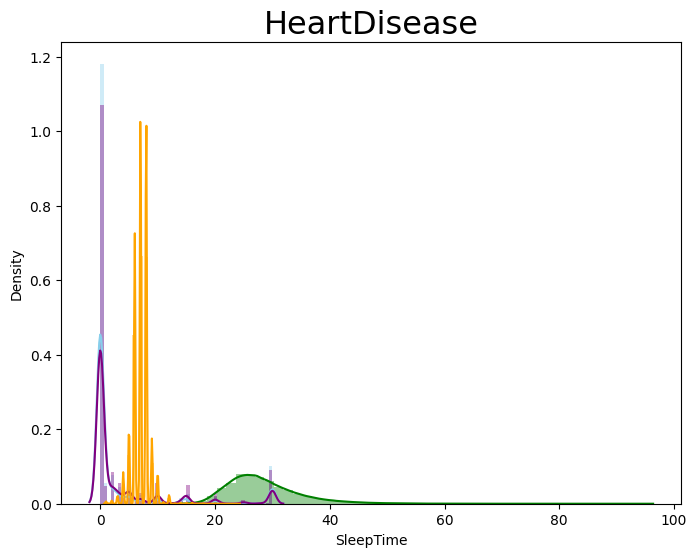

In [117]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('HeartDisease',fontsize=23)
sns.distplot(df['PhysicalHealth'], color='skyblue')
sns.distplot(df['BMI'], color='green')
sns.distplot(df['MentalHealth'], color='purple')
sns.distplot(df['SleepTime'], color='orange')


In [ ]:
hedef değişken belirlendi.

In [119]:
X = df.drop(columns=[ 'HeartDisease']).to_numpy()
y = df['HeartDisease'].to_numpy()

Farklı gözetimsiz öğrenme algoritmaları aynı veri setinde birkaç farklı metriğe göre değerlendirildi.

In [ ]:
from sklearn import metrics
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, AffinityPropagation, MiniBatchKMeans, Birch
from sklearn.cluster import DBSCAN

number_of_clusters=2

algorithms = []
algorithms.append(KMeans(n_clusters=number_of_clusters, random_state=1))
algorithms.append(MiniBatchKMeans(n_clusters=number_of_clusters,random_state=1))
algorithms.append(AgglomerativeClustering(n_clusters=number_of_clusters))
algorithms.append(SpectralClustering(n_clusters=number_of_clusters, random_state=1,
                                     affinity='nearest_neighbors'))
algorithms.append(DBSCAN(min_samples=2))


data = []
for algo in algorithms:

    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_,
                                               average_method='arithmetic'),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results1 = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure',
                                           'Silhouette'],
                       index=['K-means','MiniBatchKMeans', 'AgglomerativeClustering', 'SpectralClustering', 'DBSCAN'])

results1